# EE 538: Analog Integrated Circuit Design

## Winter 2021

## Instructor: Jason Silver

## Python packages/modules

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
#%matplotlib notebook

mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_x2y(x, y1, y2, xlabel, ylabel, y1label, y2label):
        
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y1, 'b')
    ax.plot(x, y2, 'r')
    ax.legend( [y1label,y2label] ,loc='upper center', ncol=5, fancybox=True, 
           shadow=True, bbox_to_anchor=(0.5,1.1))  
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_xlogy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);

def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])    
    
def nmos_iv_sweep(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = []
    
    for i in range(len(V_ds)):
        I_d.append(np.piecewise(V_ds[i], [V_ds[i] < V_ov, V_ds[i] >= V_ov],
                       [u_n*C_ox*(W/Leff)*(V_gs - V_thn - V_ds[i]/2)*V_ds[i]*(1+lmda*V_ds[i]) , 
                        0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds[i])])) 
    
    return np.array(I_d)

def pmos_iv_sweep(V_sg, V_sd, W, L, lmda):
    u_p = 100                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thp = -0.8                # threshold voltage (device parameter)
    V_ov = V_sg - np.abs(V_thp)
    Ldp = 0.09e-6
    Leff = L - 2*Ldp
    
    I_d = []
    
    for i in range(len(V_sd)):
        I_d.append(np.piecewise(V_sd[i], [V_sd[i] < V_ov, V_sd[i] >= V_ov],
                       [u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp) - V_sd[i]/2)*V_sd[i]*(1+lmda*V_sd[i]) , 
                        0.5*u_p*C_ox*(W/Leff)*(V_sg - np.abs(V_thp))**2*(1+lmda*V_sd[i])])) 
    
    return np.array(I_d)

def nmos_iv_sat(V_gs, V_ds, W, L, lmda):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    V_ov = V_gs - V_thn
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_d = 0.5*u_n*C_ox*(W/Leff)*(V_gs - V_thn)**2*(1+lmda*V_ds)
    
    return I_d

def nmos_diff_pair(V_id, I_ss, R_D, W, L, V_dd):
    u_n = 350                 # electron mobility (device parameter)
    e_ox = 3.9*8.854e-12/100; # relative permittivity
    t_ox = 9e-9*100;          # oxide thickness
    C_ox = e_ox/t_ox          # oxide capacitance
    V_thn = 0.7                # threshold voltage (device parameter)
    Ldn = 0.08e-6
    Leff = L - 2*Ldn
    
    I_dp = I_ss/2 + 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)
    I_dm = I_ss/2 - 0.25*u_n*C_ox*(W/L)*V_id*np.sqrt(4*I_ss/(u_n*C_ox*(W/L)) - V_id**2)

    return I_dp, I_dm

# Lecture 9 - High-gain CMOS OTA Design

## Announcements

 - Design Project Phase 1 posted, due Sunday March 7
     - PDF submission on Canvas 
 - Design Project Phase 2 posted, due Friday March 19
     - PDF submission on Canvas

## Week 9

 - Chapter 10 of Razavi (MOS physics)
 - Chapter 9 of Razavi (frequency response)
     - Section 9.4 Common Source Stage

## Overview

 - Last time...
     - Feedback
     - Stability definition and criteria (Bode/root locus)
     - Damping ratio and phase margin
     - Mirror poles
     - Frequency response of two-stage amplifiers
 - Today...
     - Miller compensation of 2-stage OTAs
     - Ahuja compensation
     - Gain-boosted structures

## Frequency response of a 2-stage amplifier

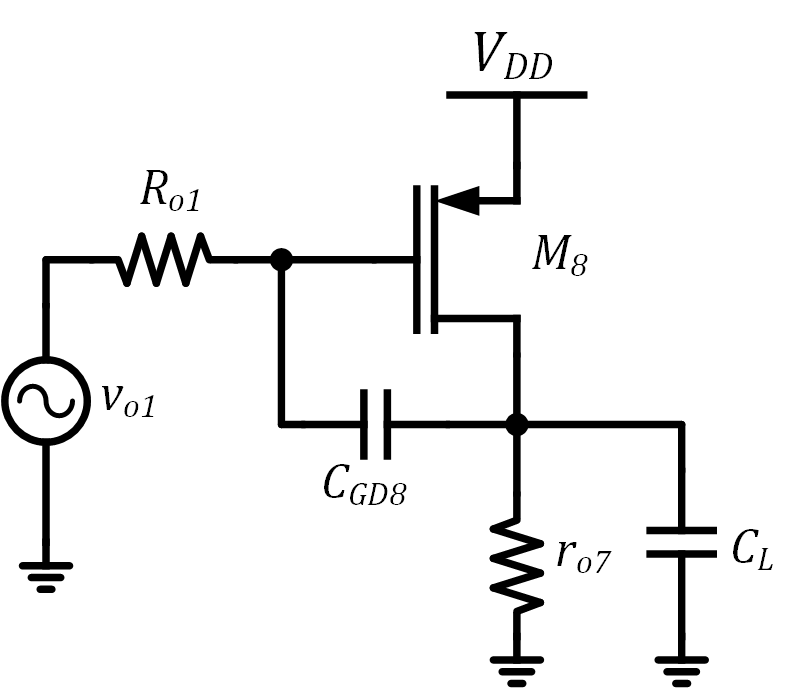

 - Assuming a "large" value of $C_{GD}$, the two poles of the transfer function can be approximated as
 
\begin{equation}
\omega_{p1} \approx \dfrac{1}{R_{o1}(1+g_{m8} R_{o2})C_{GD}} 
\end{equation} 

\begin{equation}
\omega_{p2} \approx \dfrac{g_{m8}C_{GD}}{C_{GD}(C_{GS}+C_L)+C_{GS}C_L}
\end{equation} 

 - The unity-gain frequency, $\omega_u$ is approximately
 
\begin{align}
\omega_u \approx g_{m1}R_{o1}g_{m8}R_{o2} \cdot \dfrac{1}{g_{m8}R_{o2}R_{o1}C_{GD}} = \dfrac{g_{m1}}{C_{GD}}
\end{align}
     
 - How do we guarantee a large enough value for $C_{GD}$ to accomplish pole splitting?

## Miller compensation

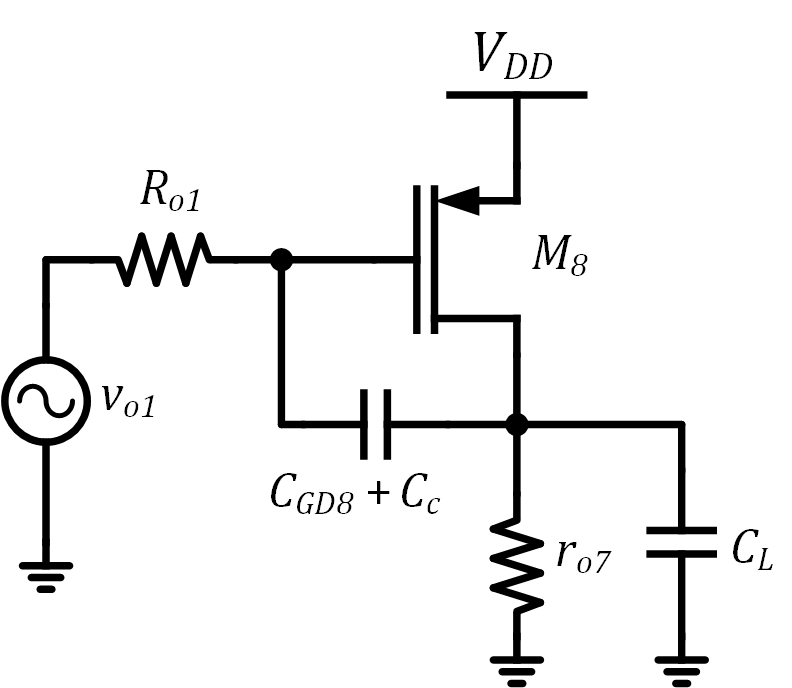

 - We can add an explicit capacitance (e.g. an integrated "MIM" capacitor) to increase the effective value of $C_{GD}$
 
 - In general, $C_c >> C_{GD}$, such that $C_c + C_{GD} \approx C_c$

 - Considering only $\omega_{p1}$ and $\omega_{p2}$ (ignoring $\omega_{z}$, for the moment), the phase margin is given by

\begin{align}
PM &\approx 90^{\circ} - \tan^{-1}\dfrac{\omega_u}{\omega_{p2}}  \\
&= 90^{\circ} - \tan^{-1}\dfrac{g_{m1}(C_L + C_{GS8})}{g_{m8}C_{c}} \\
\end{align}

 - Note that if $C_L$ and $C_c$ are comparable, $g_{m8}$ should be much greater than $g_{m1}$ to achieve a well-behaved response


In [2]:
gm1 = 1e-3
gm8 = 1e-3
ro = 100e3
R_o1 = ro/2 
R_o2 = ro/2
C_GD = 10e-12
C_GS = .2e-12
C_L = 10e-12
zeta = C_GS*C_GD + C_GS*C_L+C_GD*C_L
num = [C_GD*R_o2*gm1*R_o1, -gm8*R_o2*gm1*R_o1]
den = [R_o1*R_o2*zeta, gm1*R_o1*R_o2*C_GD+R_o1*C_GS+R_o2*(C_GD+C_L), 1]
tf_CS = signal.TransferFunction(-gm1*R_o1*gm8*R_o2,  den)
w, mag, phase = tf_CS.bode()       
f = w/2/np.pi  

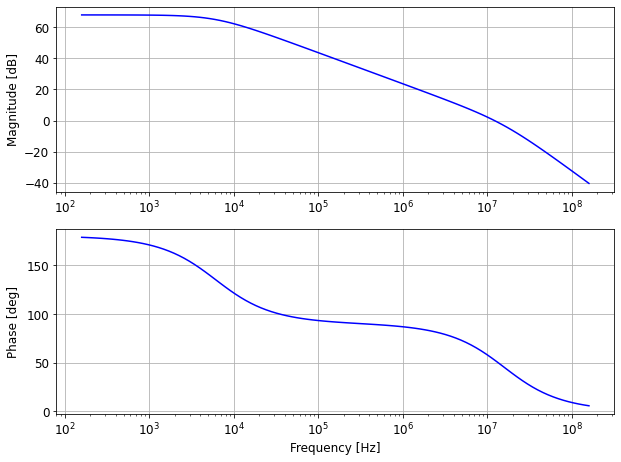

In [3]:
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

 - Even without the influence of $\omega_z$, the phase margin is only about $45^{\circ}$
 
 - What happens when we consider $\omega_z$?

## Effect of the RHP zero on phase margin

 - The expression in the numerator, $N(j\omega) = (sC_{c} - g_{m8})R_{o2}$ results in a zero in the right half of the complex plane
 
\begin{equation} 
\omega_z = \dfrac{g_{m8}}{C_{c}}
\end{equation}

 - A zero in the right-half plane increases phase lag as well as gain magnitude, which can be detrimental to stability
 
\begin{align}
PM &\approx 90^{\circ} - \tan^{-1}\dfrac{\omega_u}{\omega_{p2}} - \tan^{-1}\dfrac{\omega_u}{\omega_{z}} \\
\\
&= 90^{\circ} - \tan^{-1}\dfrac{g_{m1}C_L}{g_{m8}C_{c}} - \tan^{-1}\dfrac{g_{m1}}{g_{m8}}\\
\end{align}

 - The phase lag due to $\omega_z$ can be up to $45^{\circ}$ (or greater) if $g_{m1}$ and $g_{m8}$ are comparable

In [4]:
gm1 = 1e-3
gm8 = 1e-3
ro = 100e3
R_o1 = ro/2 
R_o2 = ro/2
C_GD = 10e-12
C_GS = .2e-12
C_L = 10e-12
zeta = C_GS*C_GD + C_GS*C_L+C_GD*C_L
num = [C_GD*R_o2*gm1*R_o1, -gm8*R_o2*gm1*R_o1]
den = [R_o1*R_o2*zeta, gm1*R_o1*R_o2*C_GD+R_o1*C_GS+R_o2*(C_GD+C_L), 1]
tf_CS = signal.TransferFunction(num,  den)
w, mag, phase = tf_CS.bode()       
f = w/2/np.pi  

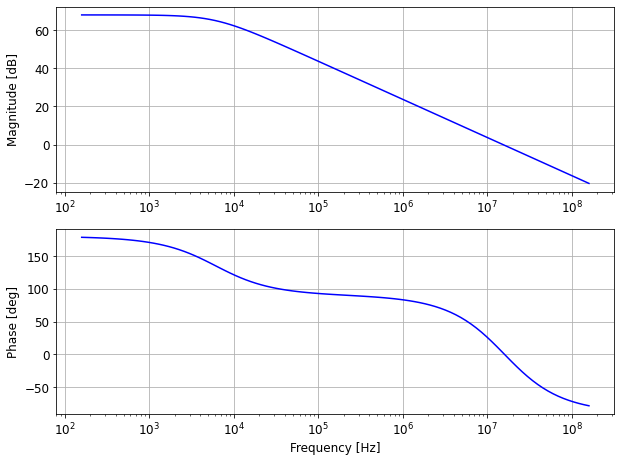

In [5]:
plot_logxy2(f, mag, f, phase, 'Frequency [Hz]', 'Magnitude [dB]',
           'Frequency [Hz]', 'Phase [deg]')

 - Here, the phase margin has decreased to zero with the inclusion of $\omega_z$
 
 - The effect isn't evident from the magnitude response alone, since the rolloff from $\omega_{p2}$ is countered by a $20dB/dec$ *increase* in the magnitude due to $\omega_z$
 
 - How do we improve the phase margin?

## Moving the RHP zero

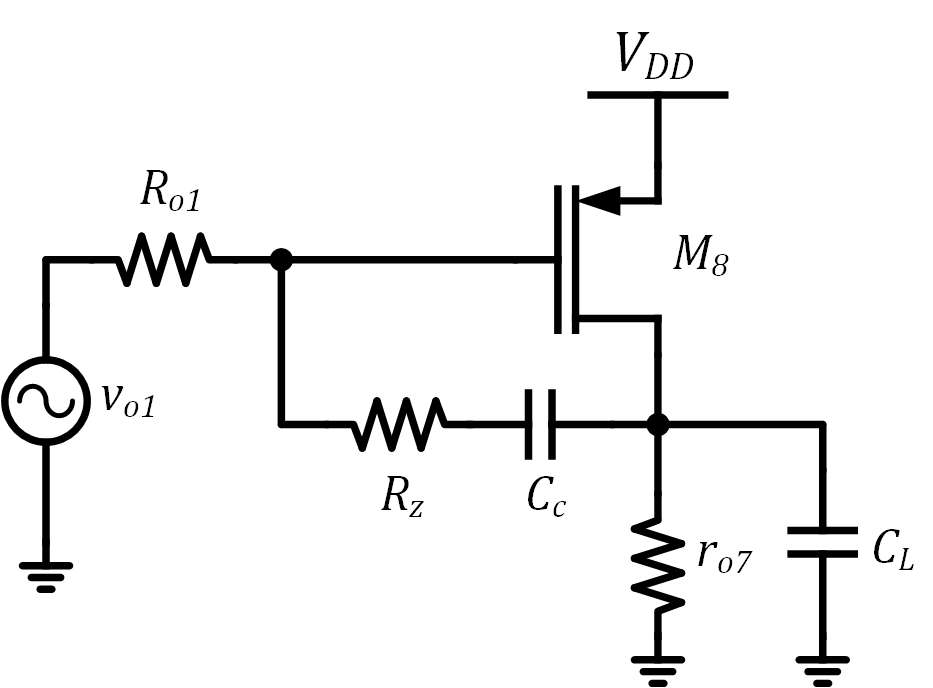

 - We can manipulate $\omega_z$ by inserting a resistor, $R_z$, in series with $C_c$
 
 - Properly chosen, $R_z$ can eliminate the RHP zero altogether (pushing it to “infinite” frequency)
 
 - This isn’t achievable in practice, since neither $g_{m8}$ nor $R_z$ is precisely defined (due to variations in process and temperature)
 
 -  We can instead move $\omega_z$ to the LHP, transforming phase lag into lead

 - With the inclusion of $R_z$ the expression for the zero becomes

\begin{equation} 
\omega_z = \dfrac{1}{C_{c}(g_{m8}^{-1} - R_z)}
\end{equation}

 - Using $R_z = 1/g_{m8}$ effectively "cancels" $\omega_z$, pushing to it to infinity
 
 - A more reliable approach is to use $R_z > 1/g_{m8}$ to move $\omega_z$ to the left-half of the complex plane
 - What is a reasonable choice for the value of $R_z$?

## Non-dominant pole cancellation

 - The modified zero location is given by

\begin{equation} 
s_z = \dfrac{1}{C_{c}(g_{m8}^{-1} - R_z)}
\end{equation}

 - If we design $R_z$ to achieve $\omega_{z,LHP} = \omega_{p1}$, this results in a value of $R_z$ given by
 
\begin{equation}
s_z = \dfrac{1}{C_{c}(g_{m8}^{-1} - R_z)} = -\dfrac{g_{m8}}{C_L + C_{GD8}} = s_{p2} \rightarrow \boxed{R_z = \dfrac{C_L + C_c + C_{GS8}}{g_{m8} C_c}}
\end{equation}

 - Moving $\omega_z$ to overlap with $\omega_{p2}$ accomplishes two things:

     1. Removes the phase lag of the RHP zero ($\omega_{z,RHP} \rightarrow \omega_{z,LHP}$)
 
     2. Reduces/eliminates the phase lag due to the non-dominant pole $w_{p2}$ 

## Variability in G<sub>m2</sub>R<sub>z</sub>

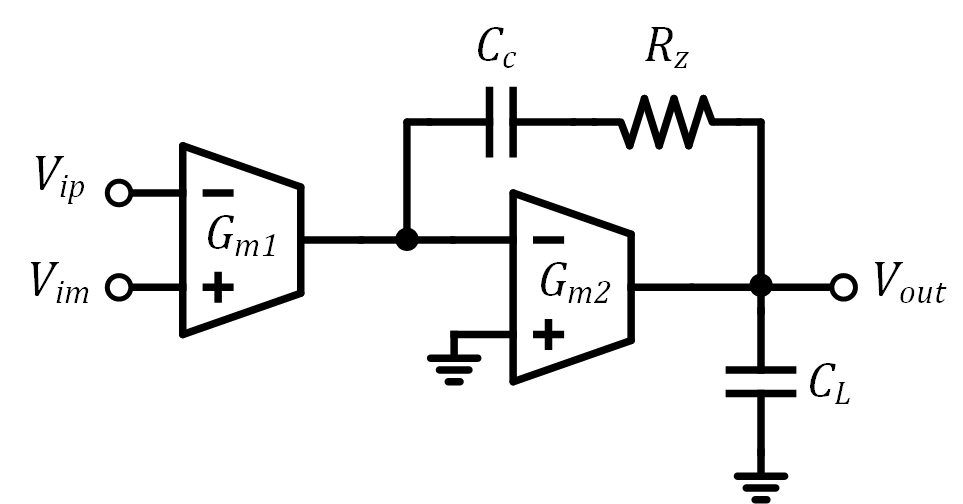

 - To maximize PM we want $R_z \approx \dfrac{C_L + C_c}{G_{m2} C_c}$
 
 - If $\dfrac{C_L + C_c}{C_c}$ is constant, we want 
 
\begin{equation}
G_{m2}R_z = \dfrac{C_L + C_c}{C_c} = constant
\end{equation}

 - Unfortunately, $G_{m2}$ and $R_z$ don’t track each other in terms of process and temperature variations
 - However, if we could somehow define $G_{m2}$ in terms of a resistance that varies in a similar manner to $R_z$, we could remove this source of uncertainty

## Constant-G<sub>m</sub> reference

 - If the second stage ($G_{m2}$) is biased using a constant-$g_m$ reference, variations in $R_z$ due to process and temperature can be tracked by $G_{m2}$
 - In this case, both $R_z$ and $R_s$ should be implemented on chip using the same type of resistor
 - Biasing in this manner results in
 
\begin{equation}
G_{m2} = \dfrac{K_2}{2\cdot R_S}
\end{equation}

 - Note that $g_m/I_D$ should be the same for $M_1$ of the reference and the input pair of $G_{m2}$

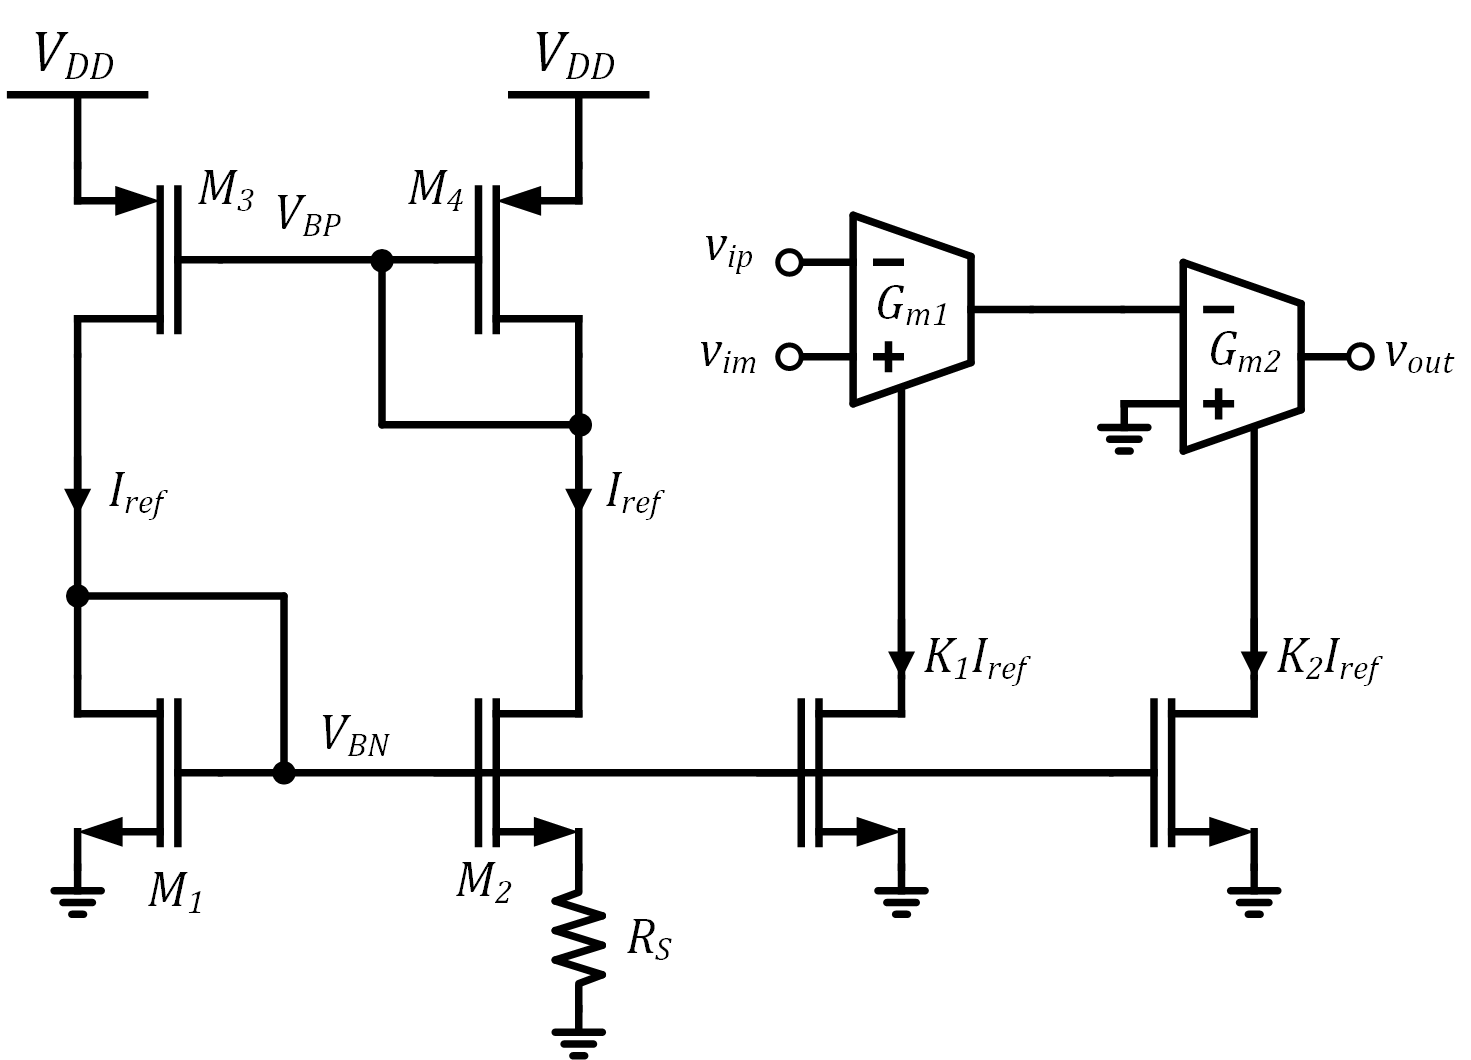

## Pole-zero doublet problem

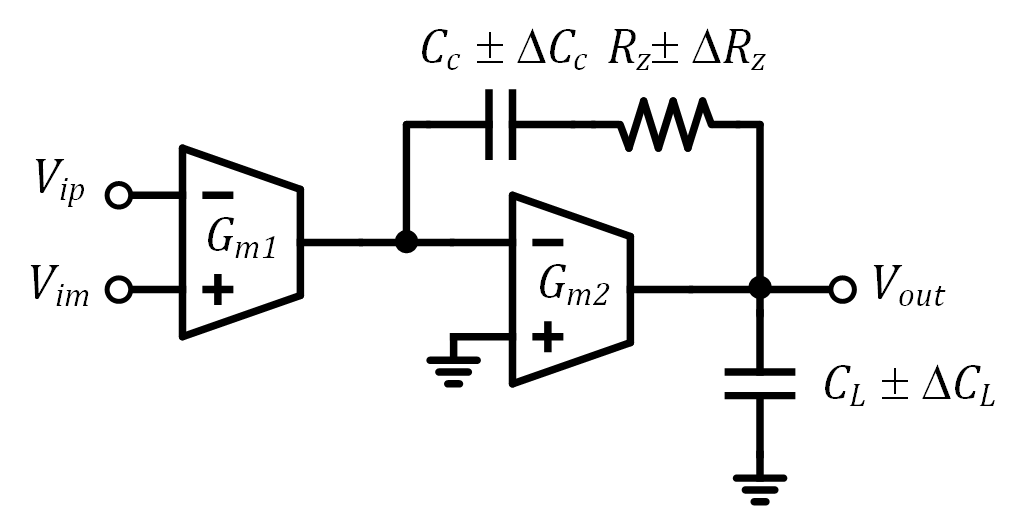

 - The possibility of canceling the non-dominant pole is attractive, but in practice cancellation is imperfect 
 
 - It cannot be guaranteed that $\omega_z = \omega_{p2}$, due to variations in $G_{m2}$, $R_z$, $C_c$, and $C_L$
 
 - Mismatch in the frequencies of $\omega_z$ and $\omega_{p2}$ results in a phenomenon known as a pole-zero "doublet," which can significantly degrade the settling time of the OTA (particularly important for switched-capacitor applications)

## An alternate approach (Ahuja compensation)

 - The feedforward path can be eliminated by the addition of a common-gate stage ($M_2$) in the feedback path
 
 - The common-gate stage effectively multiplies the transconductance of $M_1$ by the common-gate stage gain, which is approximately $g_{m2} R_{o1}$
 
 - The transfer function contains a zero in the *left half plane*, which can similarly be used to manipulate phase lag due to $\omega_{p2}$
 
 - This structure has the additional benefit of tolerance to larger values of $C_L$, since the non-dominant pole becomes (approximately)
 
\begin{equation}
\omega_{p2} \approx \dfrac{g_{m2}R_{o1}g_{m1}}{C_L}
\end{equation}

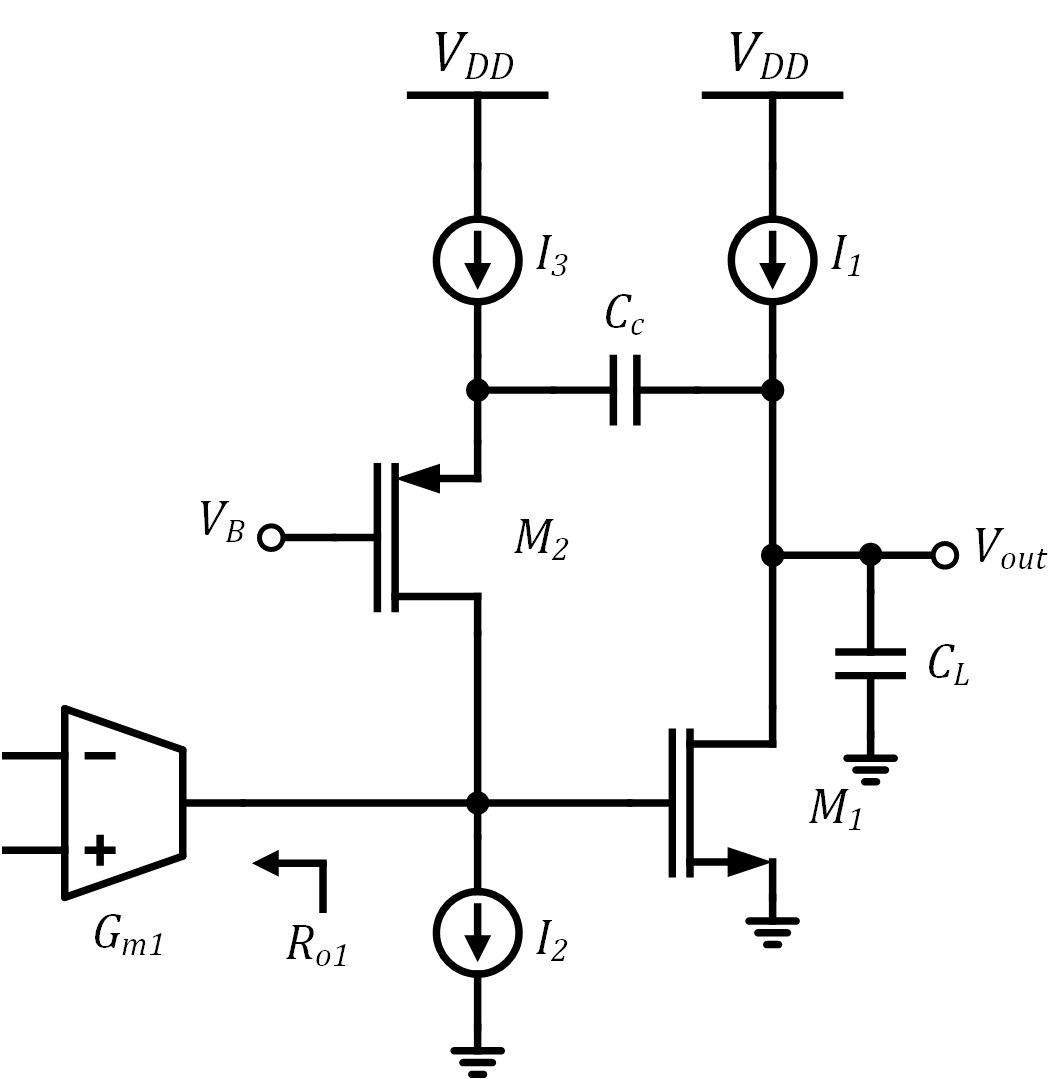

## Common-gate stage

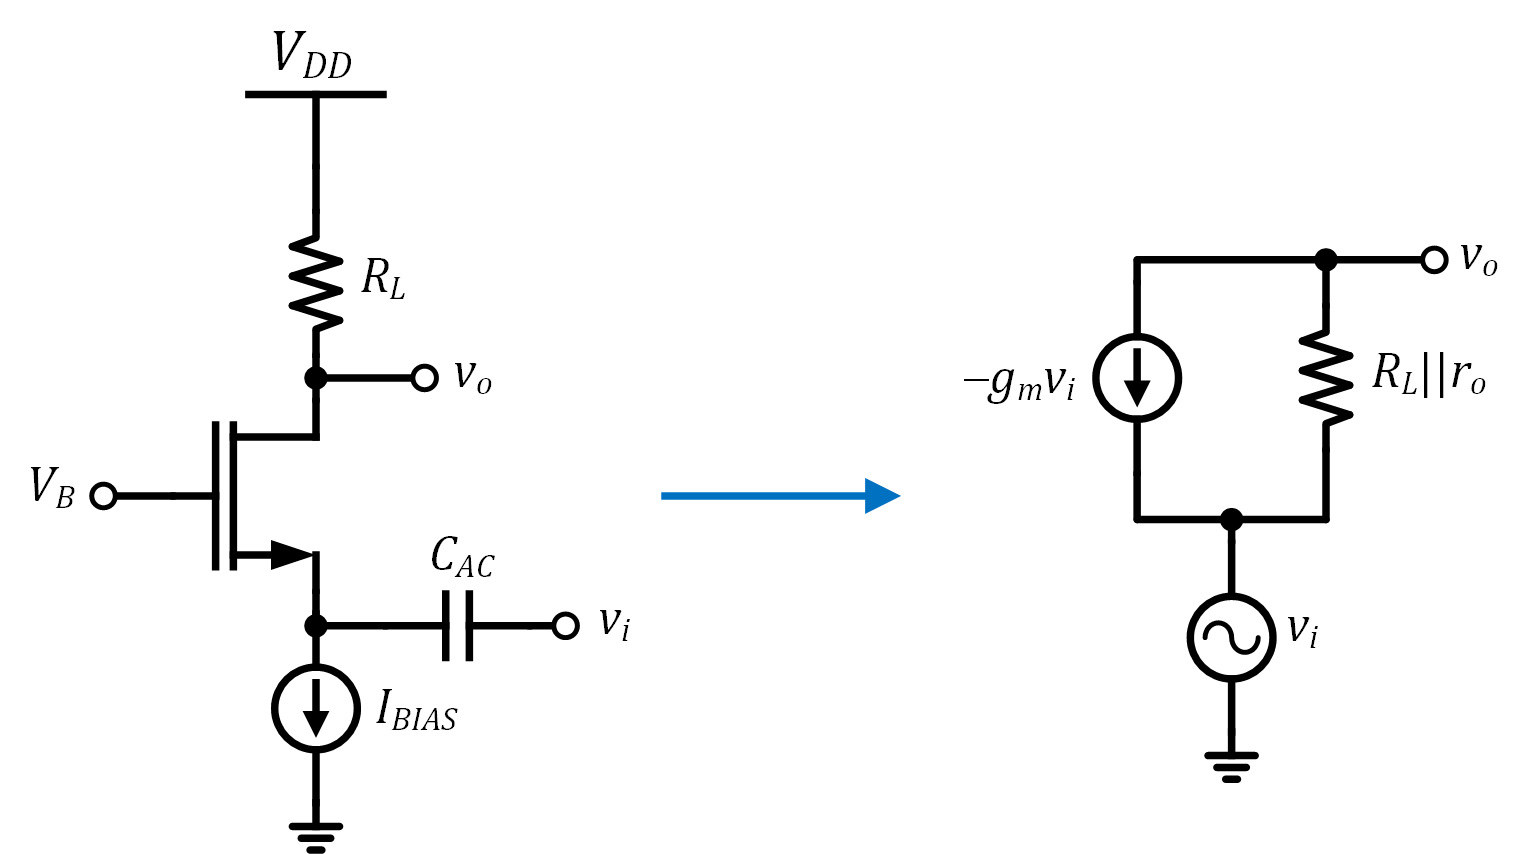

 - The common-gate stage is often used as a current-input (transimpedance) amplifier, in addition to being an instrinsic structure in the cascode amplifier
 - The voltage gain is the same as that of a common-source stage, but it is non-inverting

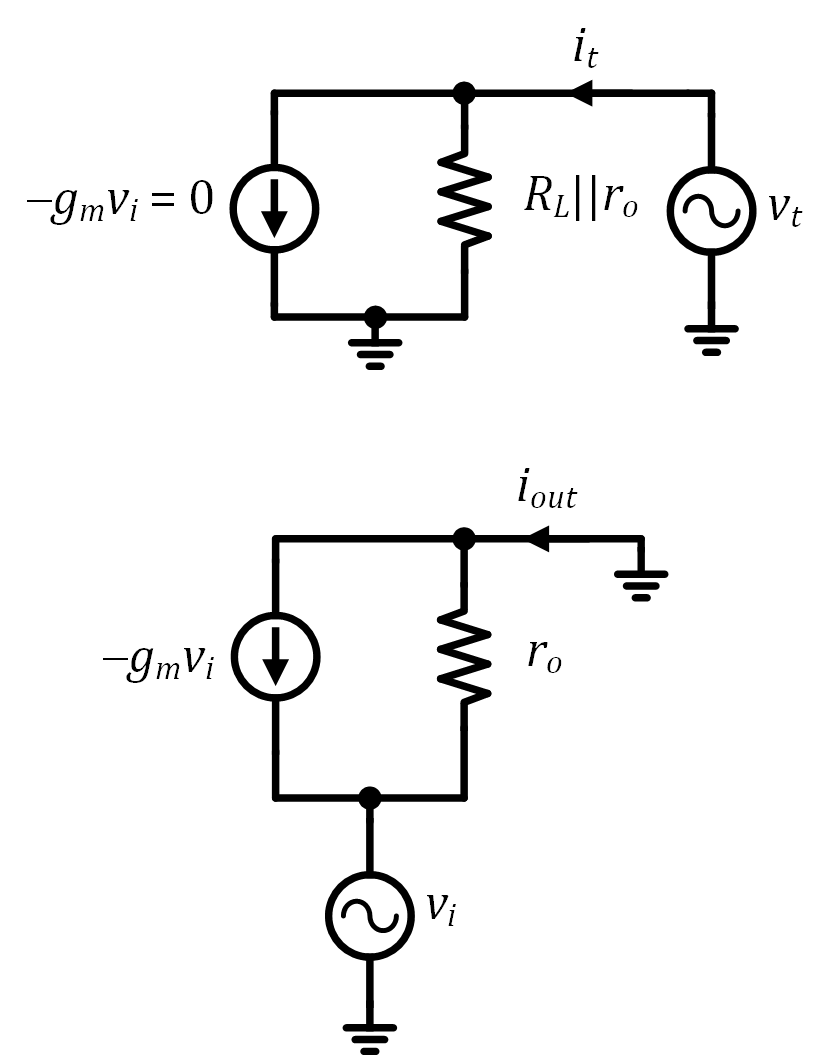

 - As with other structures, $R_o$ is determined by setting $v_i \rightarrow 0$ and finding $v_t/i_t$
 
\begin{equation}
R_o = \dfrac{v_t}{i_t} = R_L||r_o
\end{equation}

 - $G_m$ can be found by shorting the output to ground and "measuring" the output current
 
\begin{equation}
i_{out} = -g_m v_i - \dfrac{v_i}{r_o}
\end{equation}

\begin{equation}
G_m = \dfrac{i_{out}}{v_i} = -g_m - \dfrac{1}{r_o}
\end{equation}

 - The voltage gain of the common-gate stage is given by

\begin{equation}
\boxed{\dfrac{v_o}{v_i} = -G_m R_o \approx g_m(R_L||r_o)} 
\end{equation}

## Gain boosting

 - Gain-boosting can be used to enhance the effective transconductance of $M_{2}$ and $M_{3}$ and increase output impedance
 
 - $U_{1,2}$ amplify the small-signal voltages at $v_{s2}$ and $v_{s3}$ to boost the small-signal transconductance currents of $M_2$ and $M_3$
 
 - $U_1$ and $U_2$ can be implemented as single-stage OTA’s with or without cascoding

 - If $U_{1,2}$ are cascode amplifiers (with DC gain $\propto g_m^2 r_o^2$), the gain of the primary amplifier can be increased to

\begin{equation}
|A_{v0}| = G_m R_o \propto g_m^4 r_o^4
\end{equation}

 - Bias voltages $V_{BN}$ and $V_{BP1}$ should be $V_{GS2}$/$V_{SG3}$ lower/higher than the target gate bias 

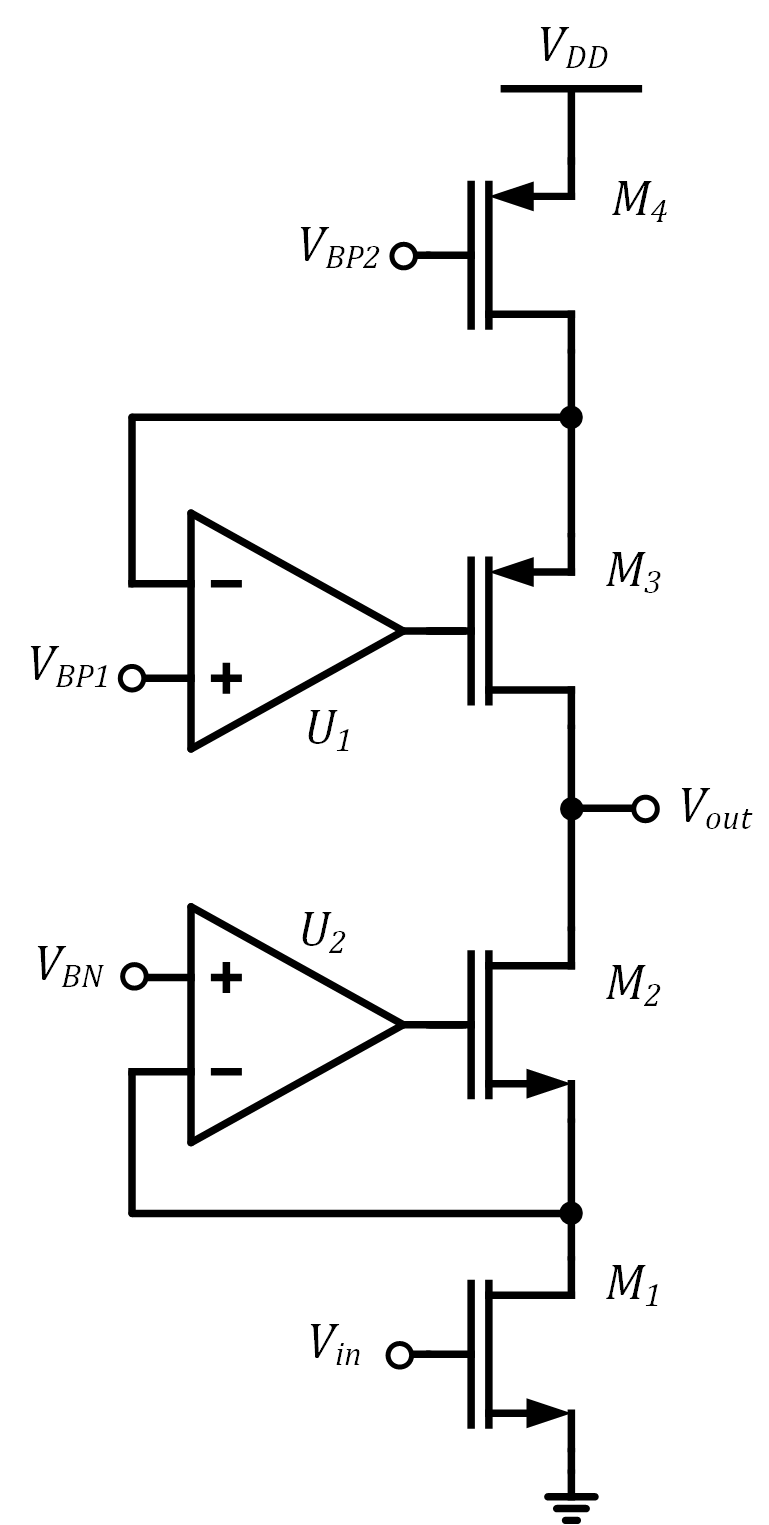

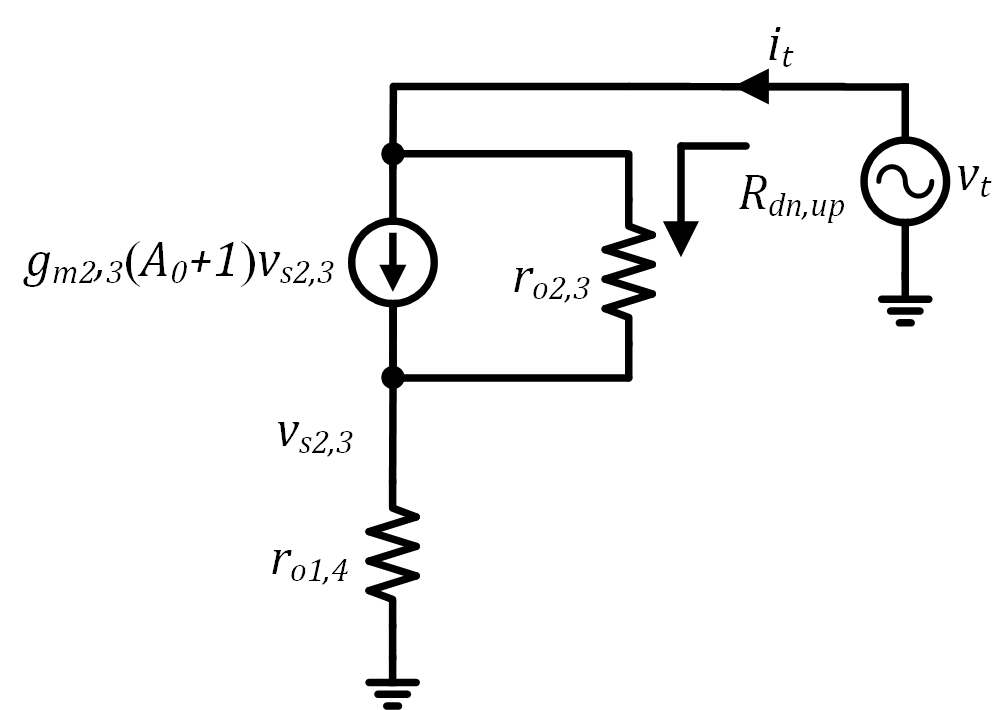

 - $A_0$ is the open-loop gain of the auxiliary amplifiers $U_1$ and $U_2$

 - KCL for the half-circuit (plus Ohm's law for $r_{o1}$) gives

\begin{equation}
i_t = g_{m2,3}(A_0+1)v_{s} + \dfrac{v_t - v_s}{r_{o2,3}} = \dfrac{v_s}{r_{o1}}
\end{equation}

 - This results in a half-circuit impedance of
 
\begin{equation}
\dfrac{v_t}{i_t} = r_{o2,3} + r_{o1,4} + g_{m2,3} r_{o2,3}r_{o1,4}(A_0+1)
\end{equation} 

 - The parallel combination of the two halves is given approximately by

\begin{equation}
R_o \approx \left[ g_{m2} r_{o1}r_{o2}A_0 \right] || \left[ g_{m3}r_{o3}r_{o4}A_0 \right] 
\end{equation}

## Implementation of U<sub>1,2</sub>

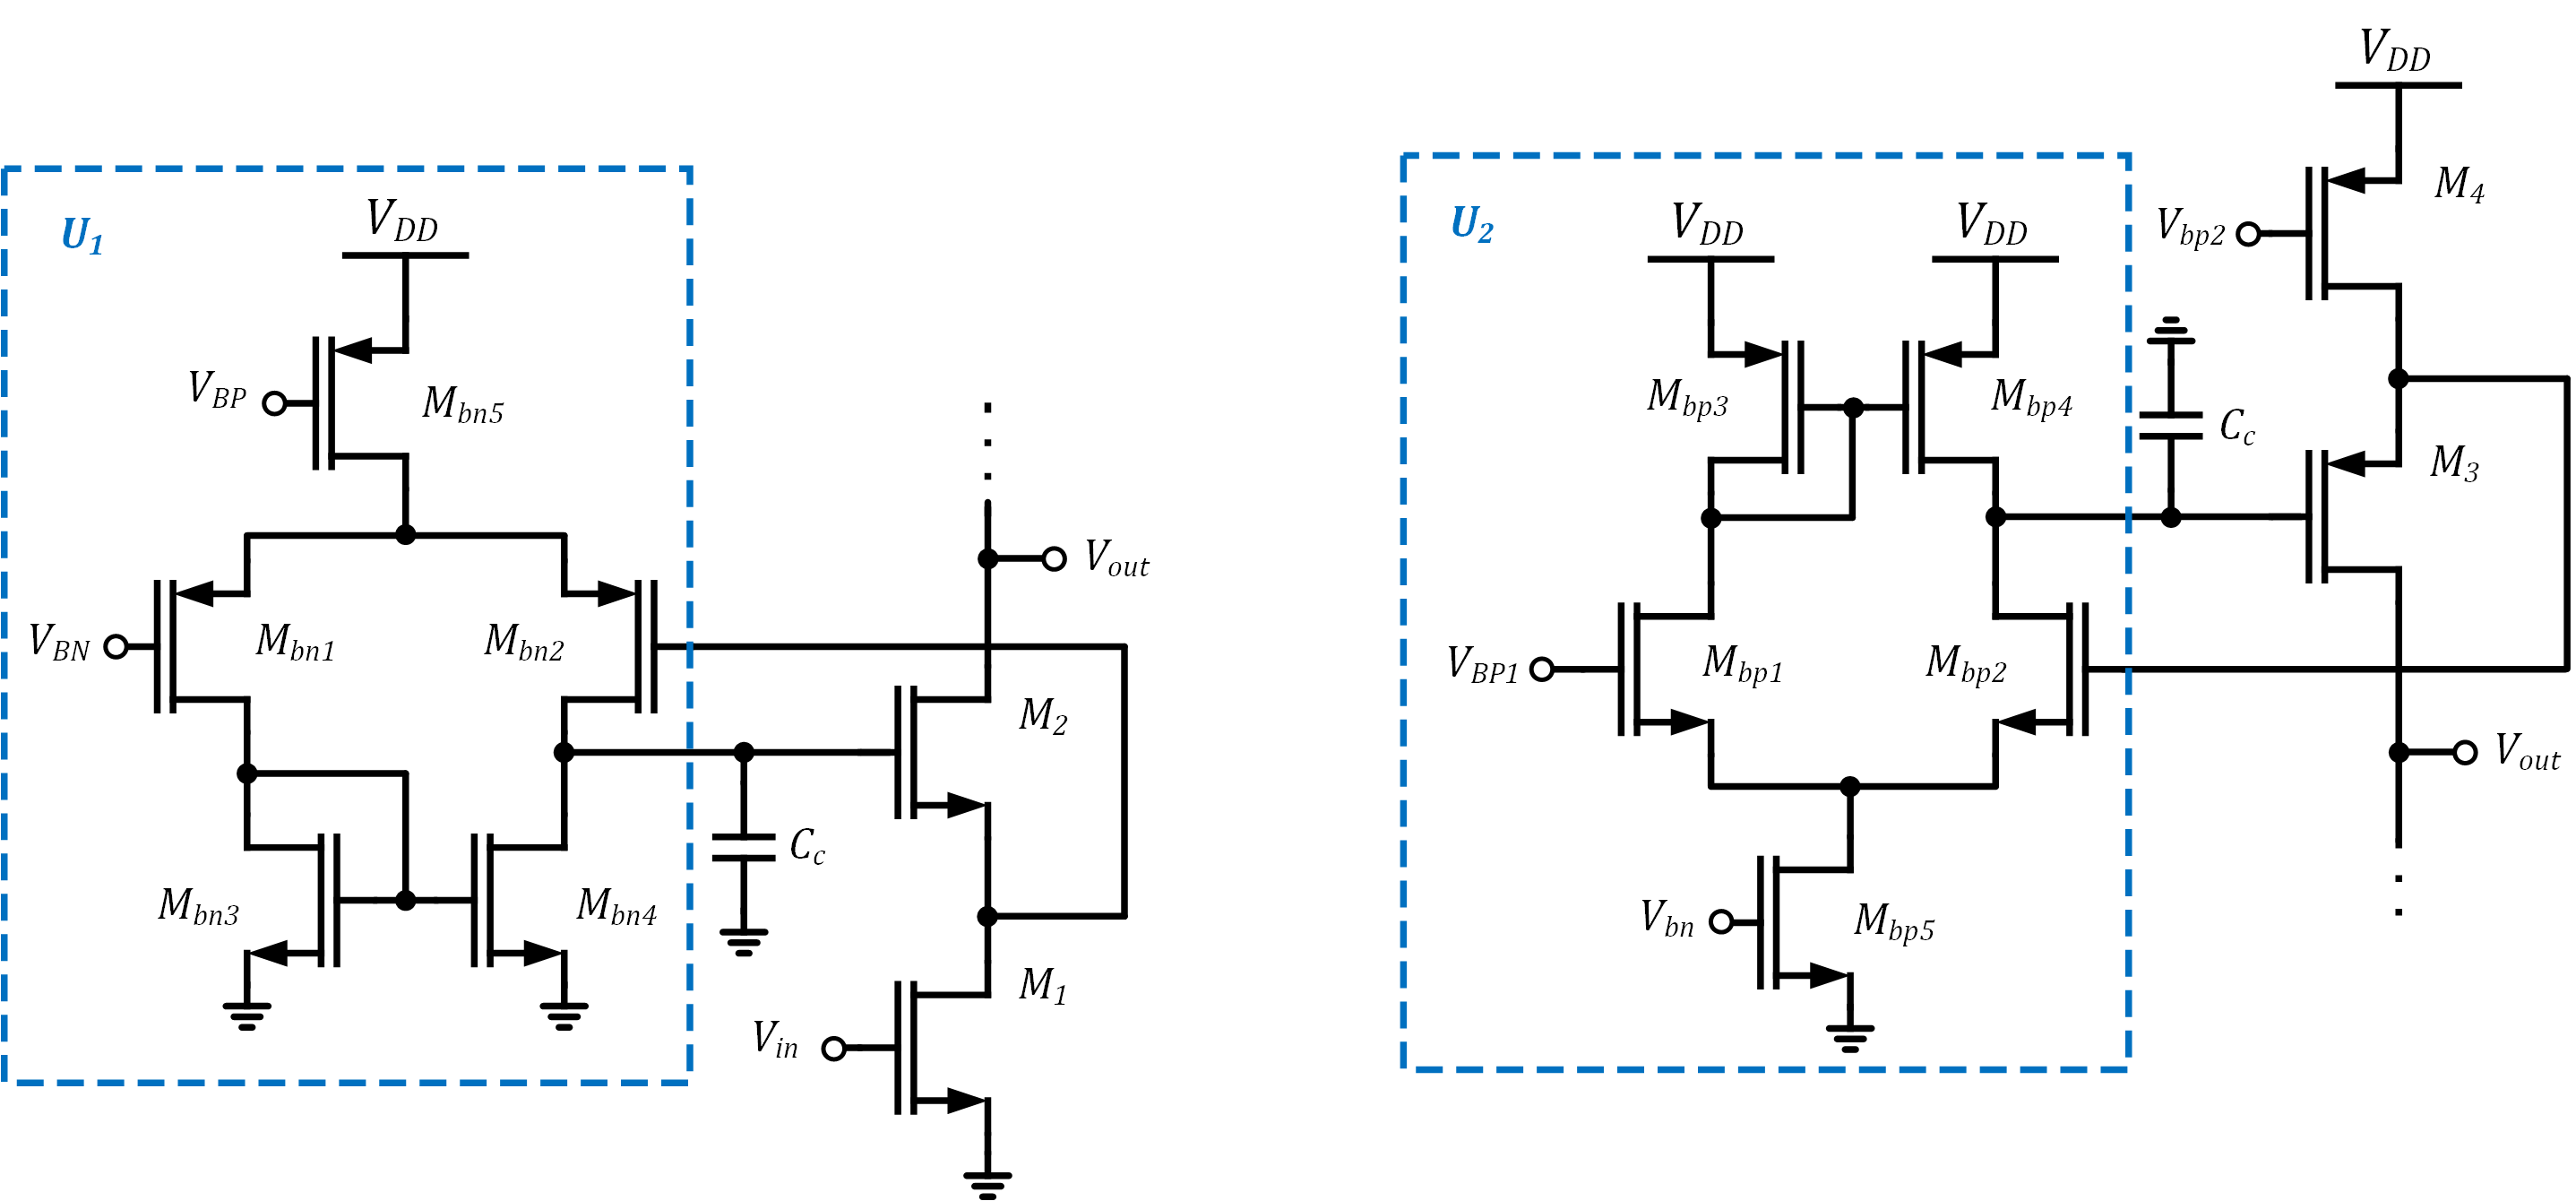

 - One means of generating the regulated cascode bias is shown here
    - $U_{1,2}$ should be compensated to ensure stability of the local feedback
    - This can be accomplished by placing a compensation capacitor ($C_c$) between the auxiliary OTA output and small-signal ground, putting the frequency of the dominant pole at $\omega_{0,boost} \approx \dfrac{2}{r_o C_c}$  

## Summary

 - 2-stage CMOS OTA's are typically compensated by increasing the Miller capacitance of the second stage to make the Miller pole dominant
 - Miller compensation produces a non-dominant pole at approximately $\omega_{p2} = G_{m2}/C_L$ and a RHP zero at $\omega_z = G_{m2}/C_c$
 - To alleviate the phase lag due to $\omega_{p2}$ and $\omega_{z}$, $\omega_{z}$ can be moved to the LHP, close in frequency to $\omega_{p2}$
 - In practice, cancellation is imperfect and can result in slow setting (pole-zero doublet)
 - Gain-boosting is an alternative to the 2-stage design that is simpler to compensate but adds complexity due to the required auxiliary amplifiers
 - Gain-boosting results in lower output swing, so a folded cascode is often preferred